In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league-season-2024/PremierLeagueSeason2024.csv


In [2]:
df = pd.read_csv("/kaggle/input/premier-league-season-2024/PremierLeagueSeason2024.csv", delimiter=",")
df

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5
5,Tottenham Hotspur,142,106,38,14,24,128,36,6
6,Aston Villa,131,107,36,15,25,123,24,7
7,West Ham United,122,121,33,18,25,117,1,8
8,Everton,87,99,30,17,29,107,-12,9
9,Newcastle United,131,124,30,15,31,105,7,10


<BarContainer object of 24 artists>

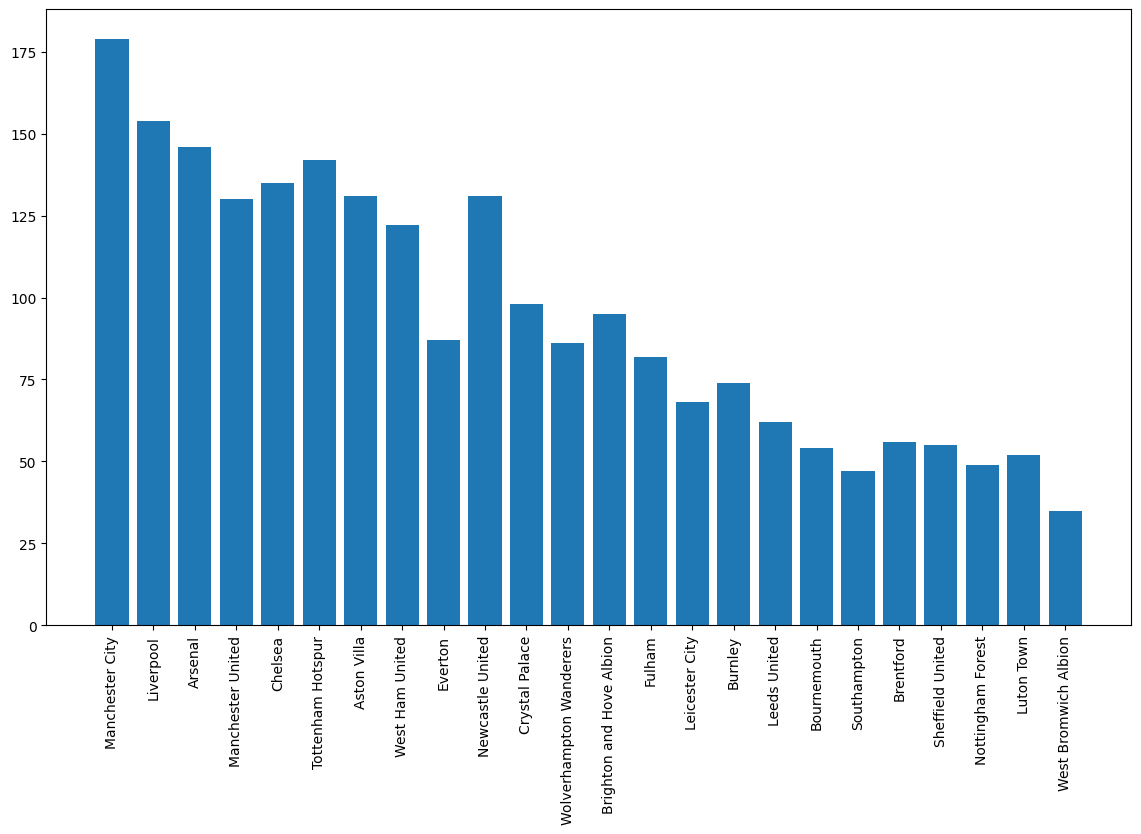

In [3]:
import matplotlib.pyplot as plt
# df.plot(kind='bar', x='team', y='rank')
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.bar(x='team', height='goals_scored', data=df)

<BarContainer object of 24 artists>

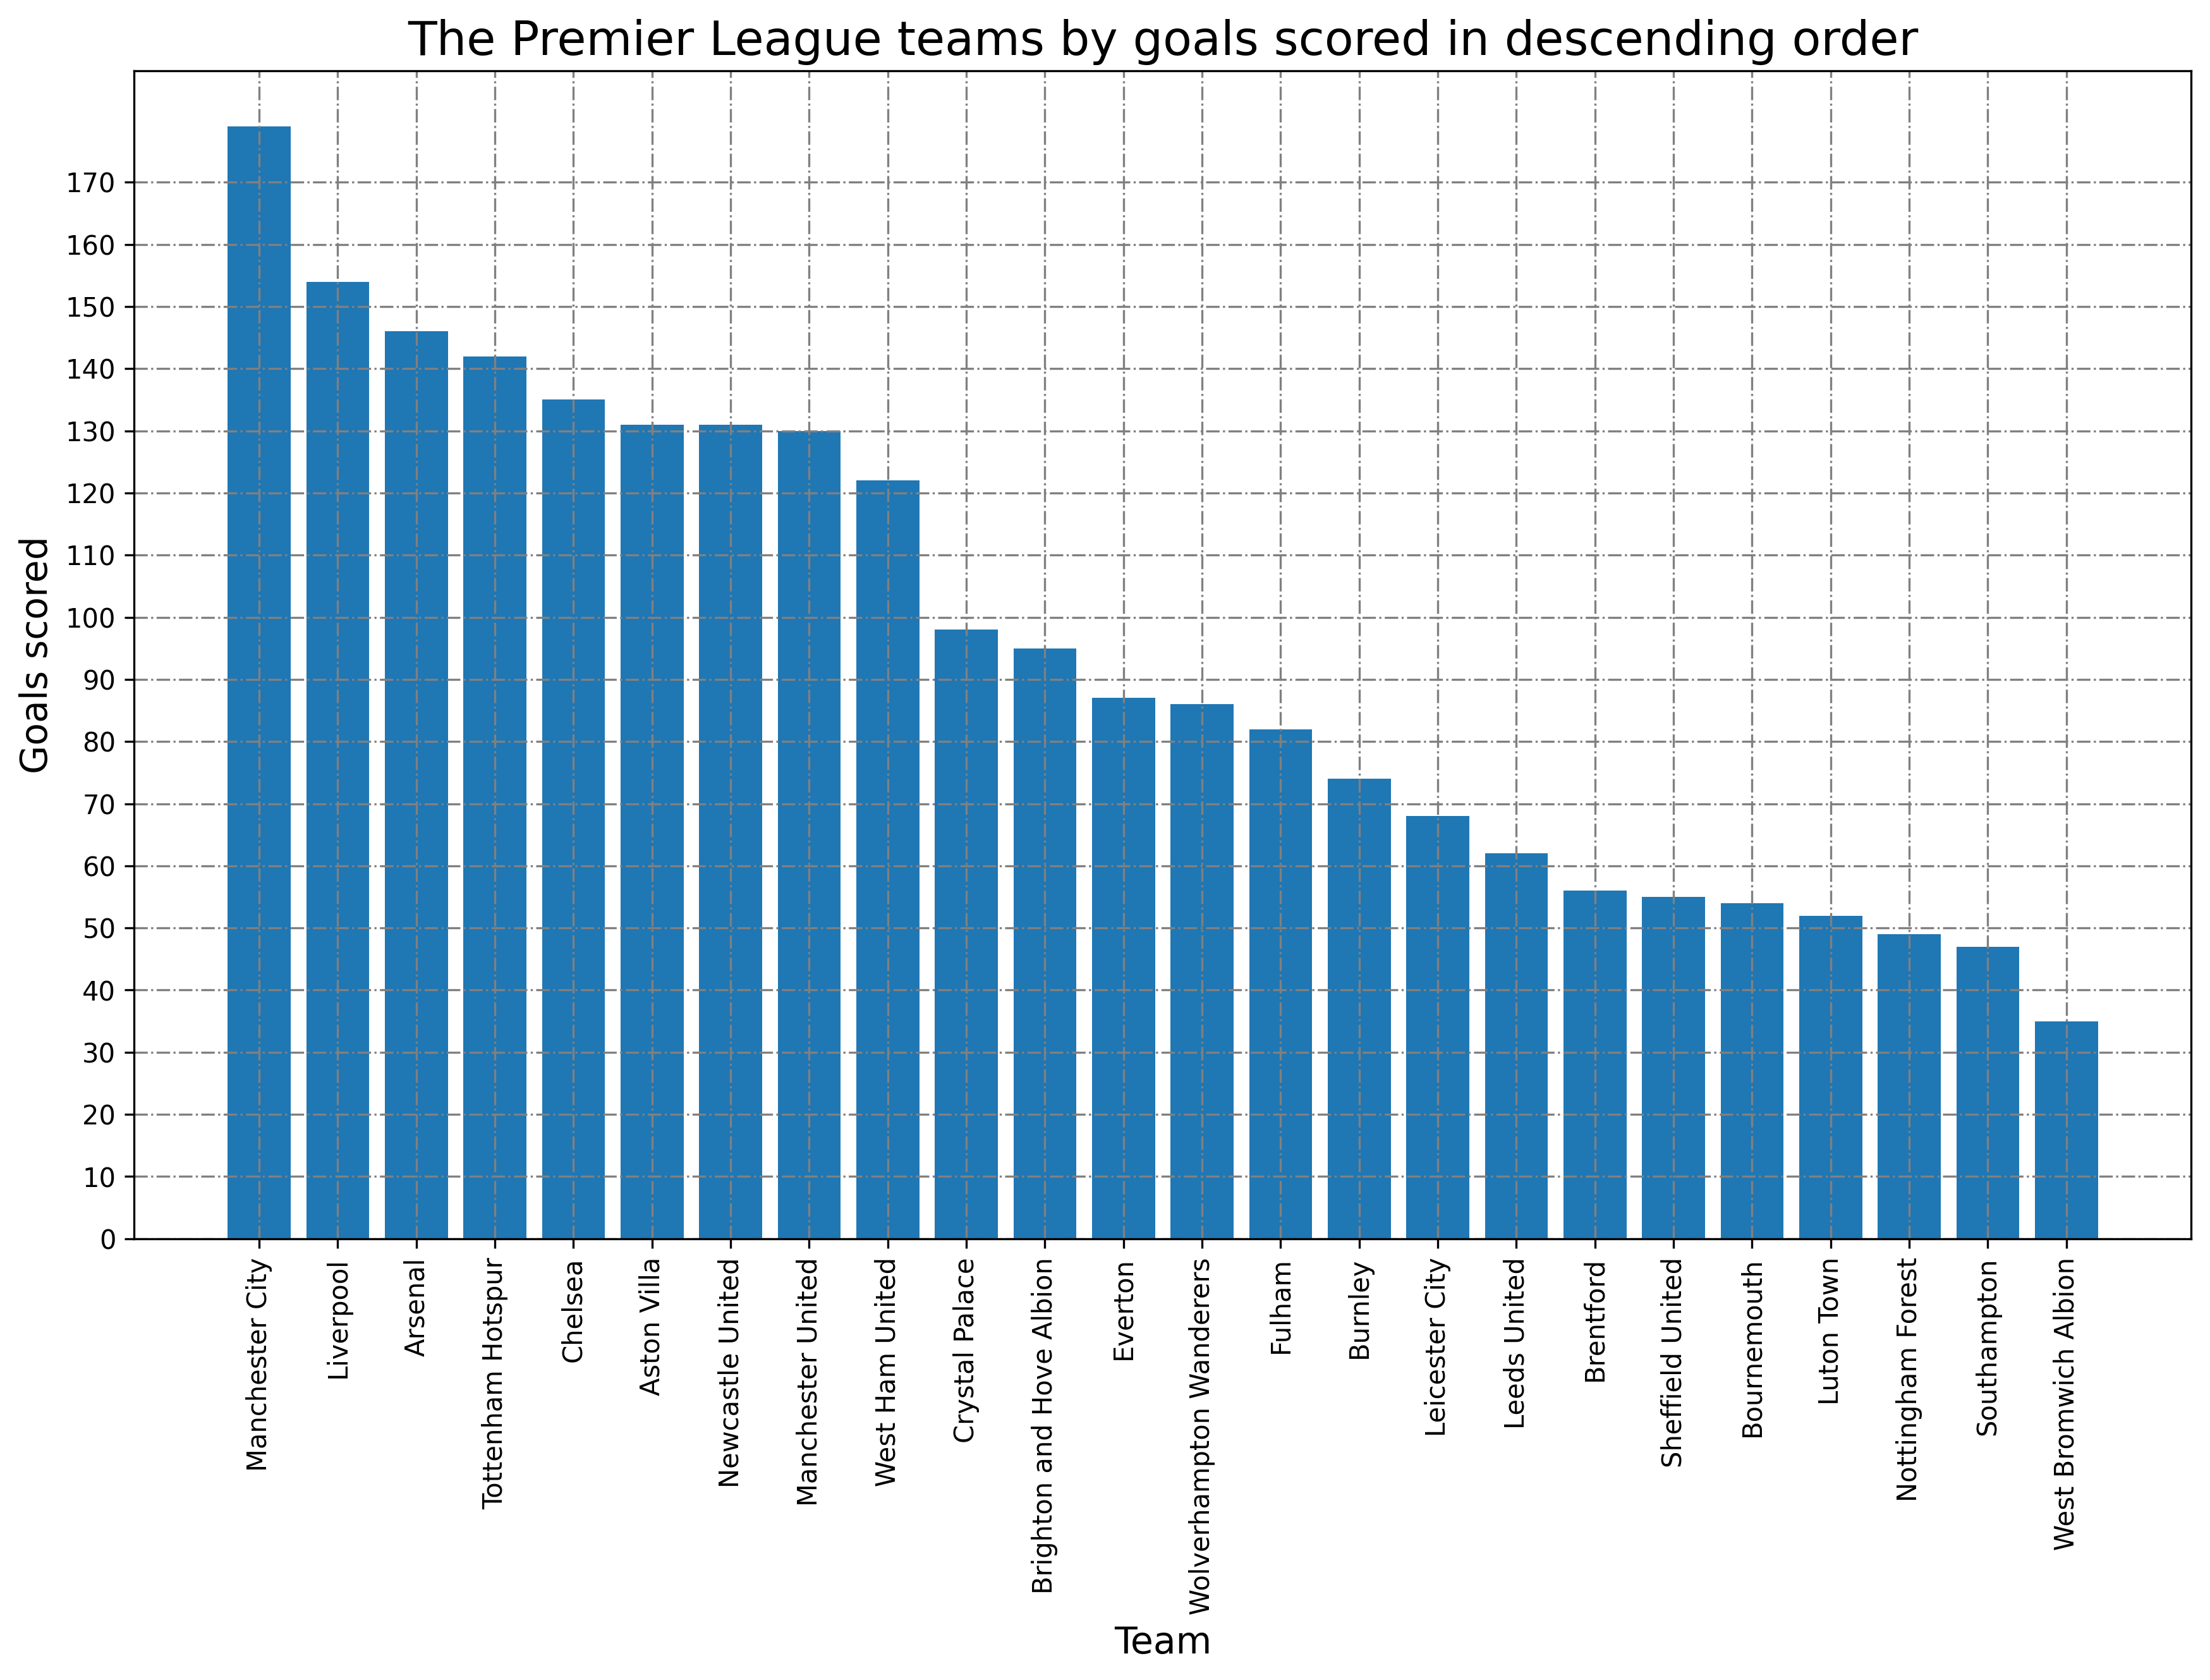

In [4]:
df_sort = df[['team', 'goals_scored']].sort_values('goals_scored', ascending=False)
plt.figure(figsize=(14,8), dpi=300)
yticks_ = list(map(int, range(0, 180, 10)))
plt.yticks(ticks=yticks_)
plt.title('The Premier League teams by goals scored in descending order', fontsize=18)
plt.ylabel('Goals scored', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='gray', linestyle='-.')
plt.bar(x='team', height='goals_scored', data=df_sort)

<BarContainer object of 24 artists>

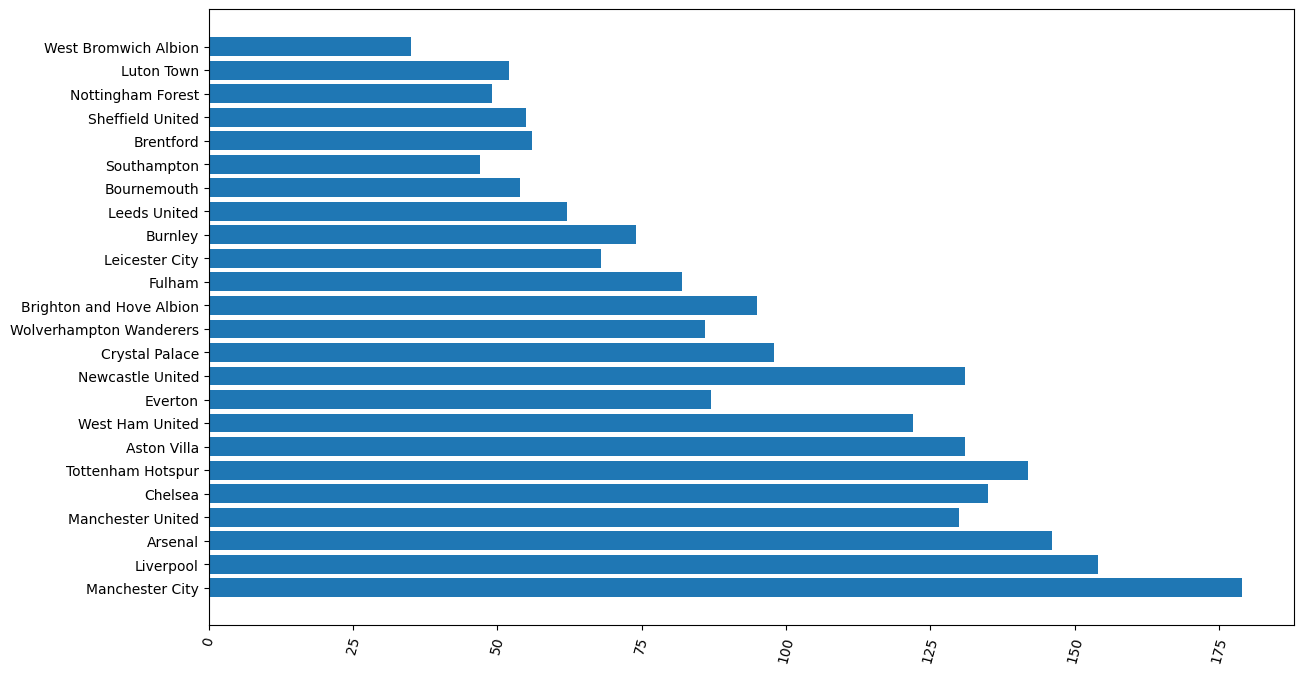

In [5]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=75)
plt.barh(y='team', width='goals_scored', data=df)

<BarContainer object of 24 artists>

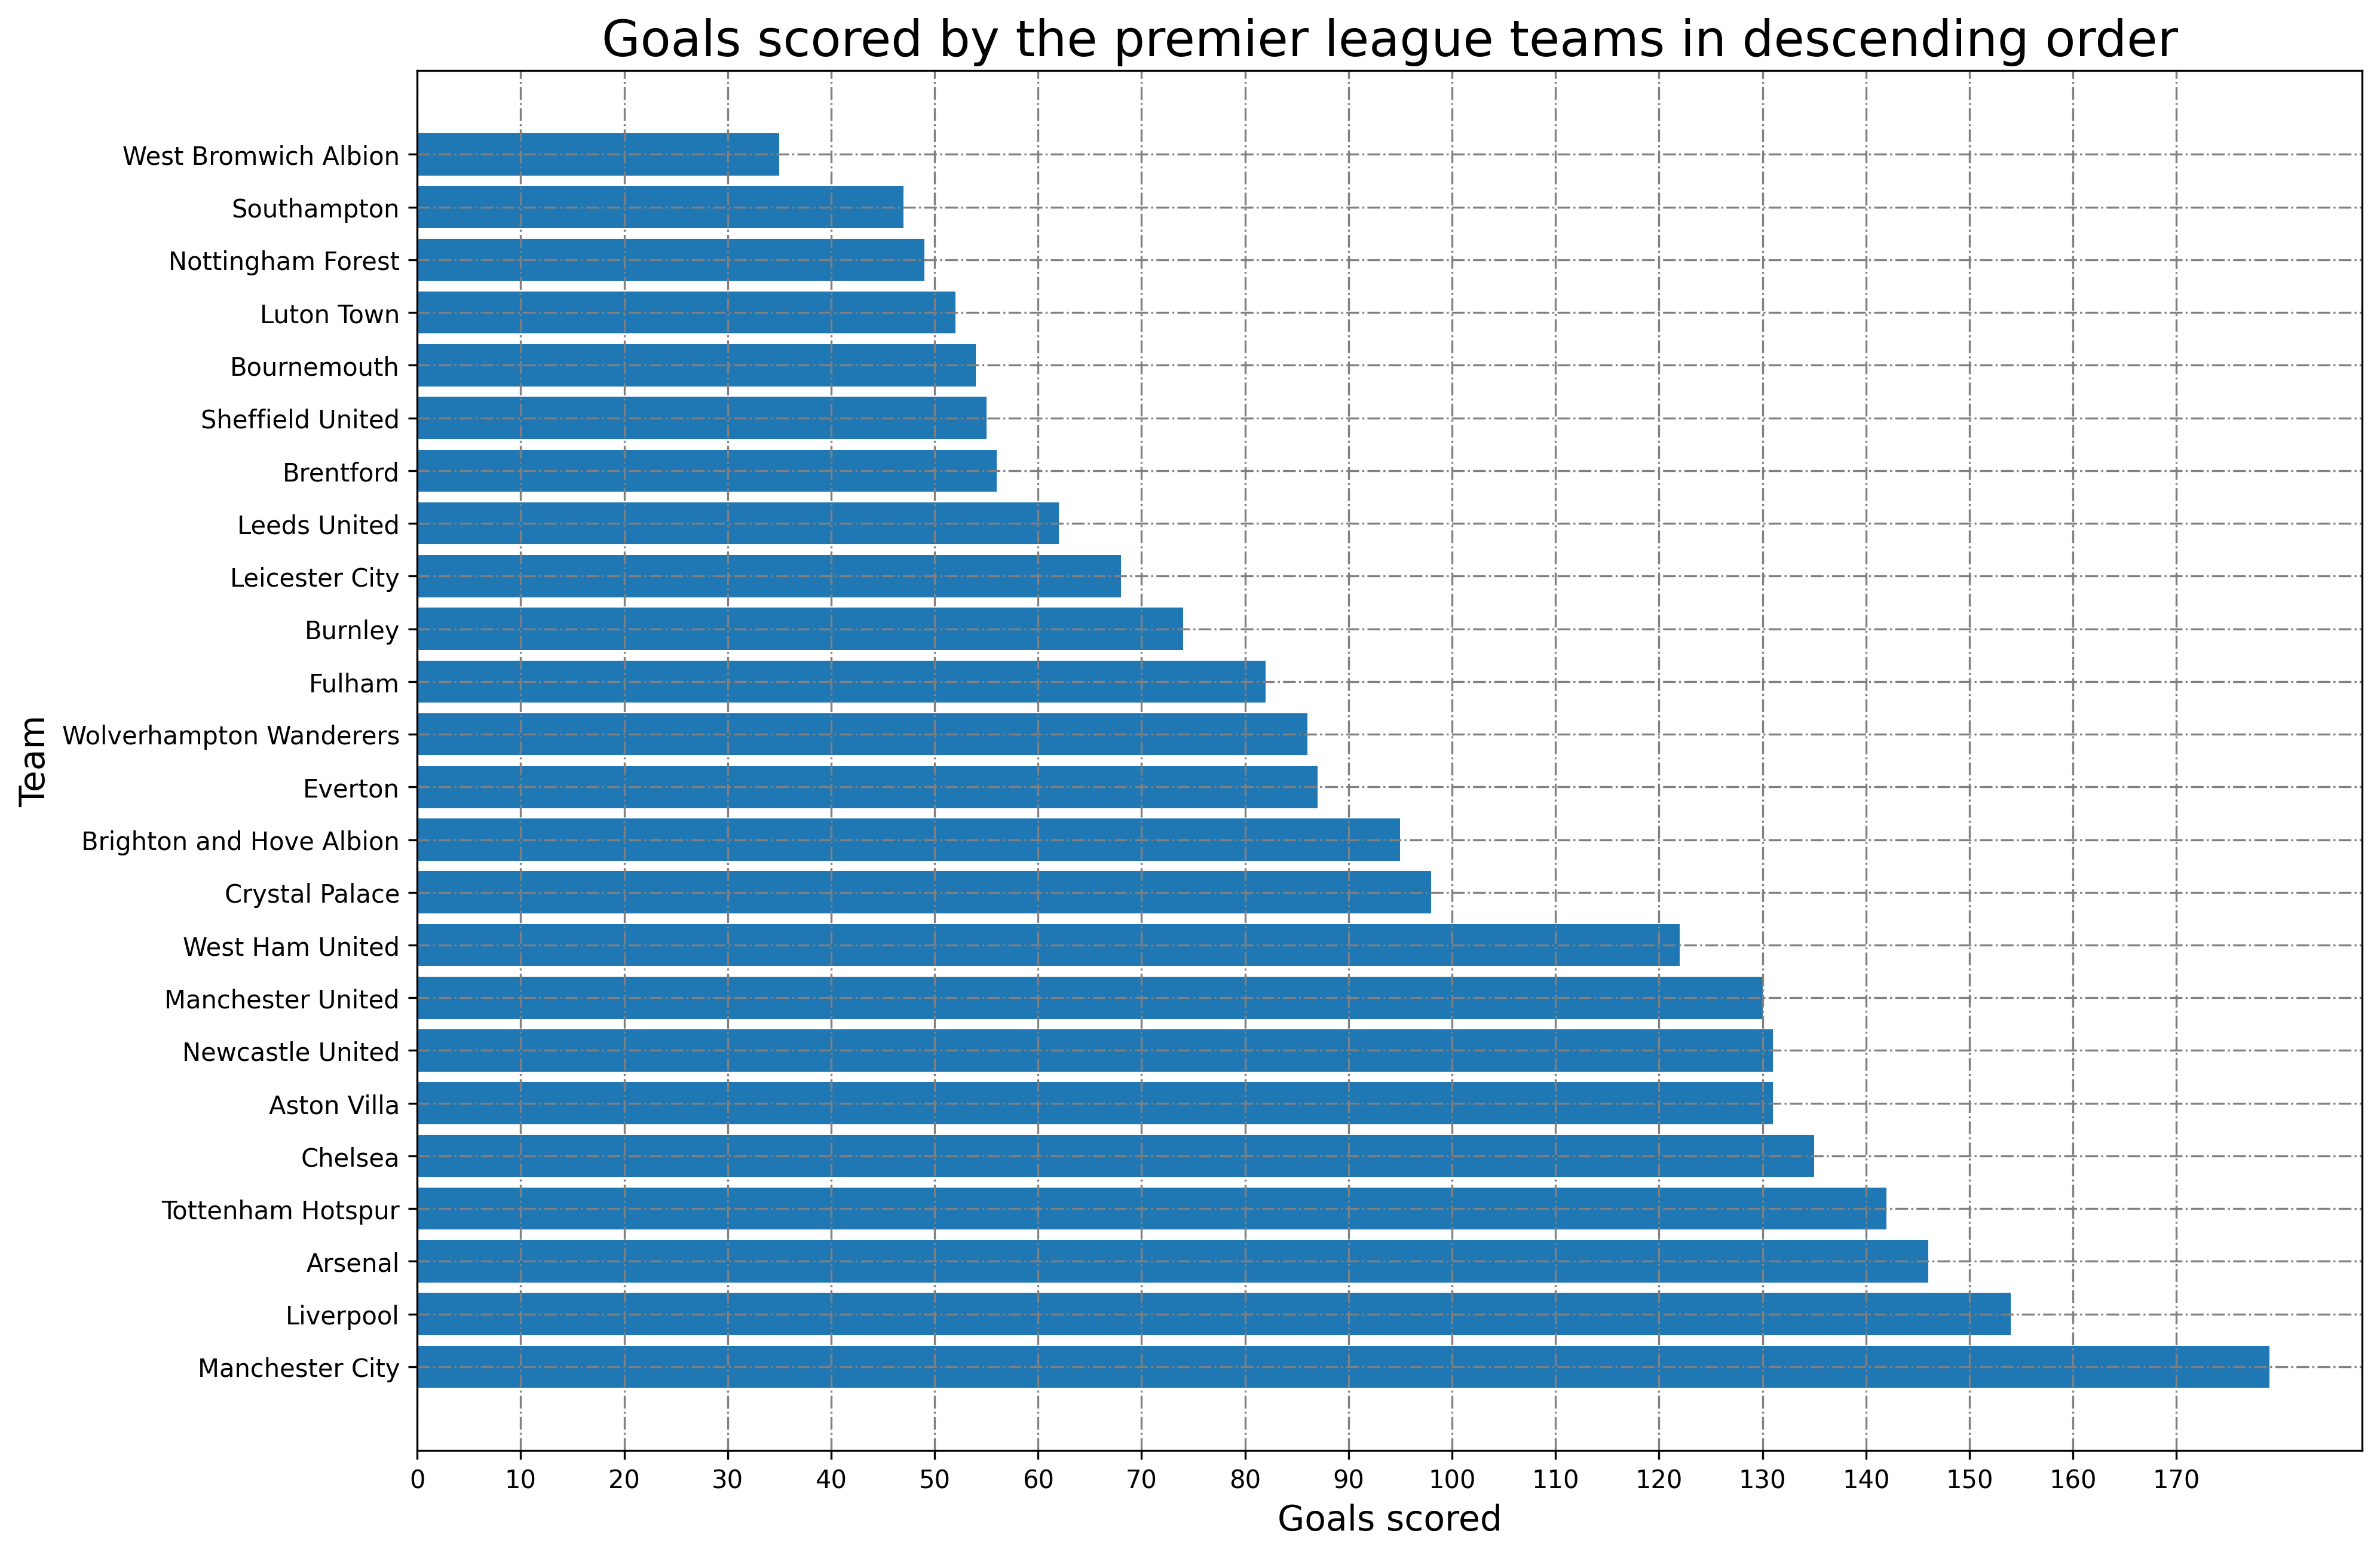

In [6]:
df_sort = df[['team', 'goals_scored']].sort_values('goals_scored', ascending=False)
plt.figure(figsize=(14, 10), dpi=300)
list_ticks = list(map(int, range(0,180,10)))
plt.xticks(list_ticks)
plt.title('Goals scored by the premier league teams in descending order', fontsize=20)
plt.ylabel('Team', fontsize=14)
plt.xlabel('Goals scored', fontsize=14)
plt.grid(color='gray', linestyle='-.')
plt.barh(y='team', width='goals_scored', data=df_sort)

In [7]:
df_ml = df[['goals_scored', 'goals_conceded', 'points']]
df_ml = df[['goals_scored', 'goals_conceded']]
df_ml

,goals_scored,goals_conceded
0,179,66
1,154,83
2,146,68
3,130,102
4,135,99
5,142,106
6,131,107
7,122,121
8,87,99
9,131,124


In [8]:
# 1. STARTING CREATING MACHINE LEARNING MODEL
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(df_ml).transform(df_ml)

In [9]:
# 2. Split data set to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df['points'], test_size=0.33)

In [10]:
from sklearn import svm
clf = svm.SVC(gamma=0.1, C=100.)

In [11]:
# 4. Model training
clf.fit(x_train, y_train)

SVC(C=100.0, gamma=0.1)

In [12]:
# 5. Model prediction
clf.predict(x_test)

array([ 39, 134,  26,  59,  91, 117,  91, 151])

In [13]:
# # 6. Model accuracy review
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_train, labels=[1,0]))

In [14]:
import pickle
s = pickle.dumps(clf)

In [15]:
df_diff = df[['points', 'goal_difference']]
df_diff

,points,goal_difference
0,177,113
1,151,71
2,150,78
3,134,28
4,130,36
5,128,36
6,123,24
7,117,1
8,107,-12
9,105,7


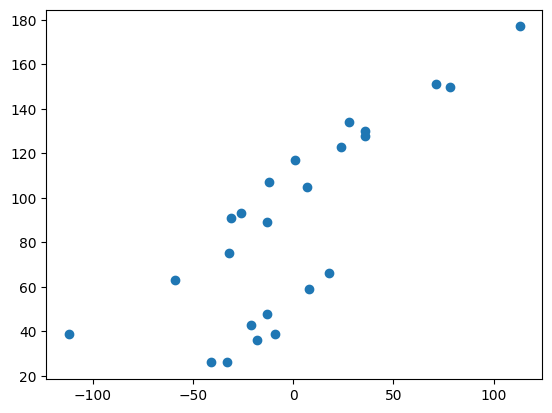

In [16]:
plt.scatter(x='goal_difference', y='points', data=df_diff)

In [17]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [18]:
regression

LinearRegression()

In [19]:
import numpy as np
regression.fit(df[['goal_difference']][0:20], df['points'][0:20])

LinearRegression()

In [20]:
Yhat = regression.predict(df[['goal_difference']][21:])

In [21]:
Yhat

array([78.2825555 , 67.04987226, 61.05910786])

In [22]:
df_goal = df[['team','goal_difference']][21:]
df_goal['Yhat (predicted value of points)'] = Yhat

In [23]:
df_goal

,team,goal_difference,Yhat (predicted value of points)
21,Nottingham Forest,-18,78.282556
22,Luton Town,-33,67.049872
23,West Bromwich Albion,-41,61.059108


In [24]:
df

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5
5,Tottenham Hotspur,142,106,38,14,24,128,36,6
6,Aston Villa,131,107,36,15,25,123,24,7
7,West Ham United,122,121,33,18,25,117,1,8
8,Everton,87,99,30,17,29,107,-12,9
9,Newcastle United,131,124,30,15,31,105,7,10


In [25]:
# We can see that accuracy of my model is bad, so I decided to add wins and losses features to my model

In [26]:
lm = LinearRegression()

In [27]:
import numpy as np
lm.fit(df[['wins','losses','goal_difference']][0:20], df['points'][0:20])

LinearRegression()

In [28]:
Yhat2 = lm.predict(df[['wins','losses','goal_difference']][21:])

In [29]:
df_goal2 = df[['team','wins','losses','goal_difference']][21:]
df_goal2['Yhat (predicted value of points)'] = Yhat2

In [30]:
df_goal2

,team,wins,losses,goal_difference,Yhat (predicted value of points)
21,Nottingham Forest,9,20,-18,35.728749
22,Luton Town,6,24,-33,27.827779
23,West Bromwich Albion,5,22,-41,24.166292


In [31]:
lm.coef_

array([ 3.30417914,  0.34600262, -0.04183714])

In [32]:
lm.intercept_

-1.6819837689463668

In [33]:
print(f"The model equation: Y={round(lm.intercept_, 3)} + {round(lm.coef_[0], 3)}x1 + {round(lm.coef_[1], 3)} x2 {round(lm.coef_[2], 3)}")

The model equation: Y=-1.682 + 3.304x1 + 0.346 x2 -0.042


In [34]:
# Now I get better accuracy